In [91]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Input
import os
from pickle import dump

In [95]:
n_test = 40000
k = 100
good_data = True
gseed = 6
degree = 4

current_dir = "./"  # Assuming current directory
dir = "/"
if os.name == "nt":
    current_dir = ".\\"
    dir = "\\"

In [4]:
""" ------------- LOADING DATA ----------------------------"""

if good_data:
    X = np.load("X_convex_{}.npy".format(degree))
    Y = np.load("Y_convex_{}.npy".format(degree))
else :
    X = np.random.randint(0, 100, size=(n_test * 2, 22))
    Y = np.random.randint(0, 2, size=(n_test * 2))

In [82]:
"""------------------NORMALIZING DATA-------------------------"""

X_train = X[:n_test,:22]
X_test = X[n_test:,:22]

Y_train = Y[:n_test]
Y_test = Y[n_test:]

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)


[[-0.36253993  0.44963708  0.00426963 ...  0.33788247  0.15353752
   0.82190983]
 [-0.28683201  0.27524375 -0.0458306  ...  0.16623031  0.07772546
   0.4007279 ]
 [-0.24897805  0.18804708 -0.07088072 ...  0.08040423  0.03981943
   0.19013693]
 ...
 [ 0.75021886 -0.09230356  1.3025546  ...  0.39050221 -0.27654227
  -0.78019156]
 [-0.33564175  0.55021909 -0.36057596 ... -1.14012798 -0.72144134
   0.01700181]
 [-0.27338292  0.32553475 -0.2282534  ... -0.57277492 -0.35976397
  -0.00172612]]


In [83]:
"""---------------------DEFINING MODEL-------------------------"""

def custom_activation(x):
    return 0.5 * (1 + tf.math.sign(x)) * (x + 1/100) +  0.5 * (1 - tf.math.sign(x)) * tf.math.exp(tf.math.minimum(0.0,x)) / 100

def custom2_activation(x):
    return tf.where(x < 0, tf.exp(tf.math.minimum(0.0, x) * k) / k, x + 1/k)

model = Sequential([])
model.add(Input(shape=(22,)))
model.add(Dense(200, activation=custom_activation, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-7.0, maxval=7.0, seed=gseed)))
model.add(Dense(200, activation=custom_activation))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=["accuracy"])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 200)            │         4,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,001 (175.79 KB)

 Trainable params: 45,001 (175.79 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
"""------------- MODEL DEFINITION-------------------"""

def learning_rate(epoch):
    if epoch < 30 :
        return 1e-3
    elif epoch < 35 :
        return 1e-4
    else :
        return 1e-5
    
learning_rate_cb = callbacks.LearningRateScheduler(learning_rate)

history = model.fit(X_train, Y_train, epochs=40, batch_size=16, callbacks=[learning_rate_cb])

Epoch 1/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6689 - loss: 0.8665 - learning_rate: 0.0010
Epoch 2/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8575 - loss: 0.3452 - learning_rate: 0.0010
Epoch 3/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9029 - loss: 0.2334 - learning_rate: 0.0010
Epoch 4/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9204 - loss: 0.1905 - learning_rate: 0.0010
Epoch 5/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9342 - loss: 0.1599 - learning_rate: 0.0010
Epoch 6/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9456 - loss: 0.1343 - learning_rate: 0.0010
Epoch 7/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9501 - loss: 0.1249 - learning_rate: 0.0010
Epoch 8/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9547 - loss: 0.1135 - learning_rate: 0.0010
Epoch 9/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9593 - loss: 0.1010 - learning_rate:

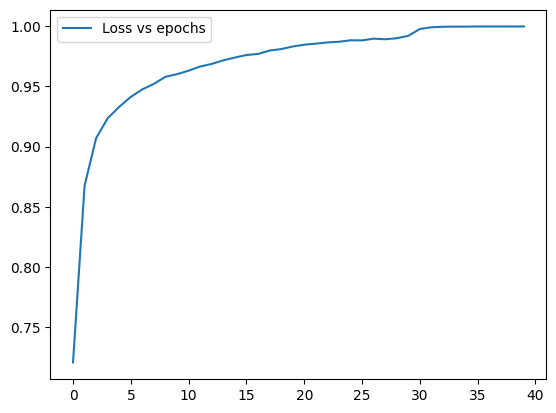

354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9462 - loss: 0.2759
Test accuracy: 0.9469817876815796


In [78]:
"""------------------ EVALUATING MODEL ------------------"""
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(history.history['accuracy'][0:], label='Loss vs epochs')
ax.legend()
plt.show()

loss, accuracy = model.evaluate(X_test, Y_test)
print("Test accuracy:", accuracy)

In [94]:
"""------------------- SAVING MODEL --------------------"""
number = 0
folderpath = current_dir + "NN" + dir
filename_model = folderpath + f"model_{number}.keras"
while os.path.exists(filename_model):
    number = number + 1
    filename_model = folderpath + f"model_{number}.keras"

filename_weights = folderpath + f"model_weights_{number}.weights.h5"
filename_scaler = folderpath + f'scaler_{number}.pkl'


model.save(filename_model)
model.save_weights(filename_weights)
dump(X_scaler, open(filename_scaler, 'wb'))

In [90]:
coeff = np.array([[0.94023082,6.97173563,-15.99134392,    8.91103779,    0.82695289,
   25.02515934,  -28.04553872,  -25.50761266,    9.46243293,   14.55959669,
 -172.7153104,   159.77415504,  -38.62615735,   22.49232082,  130.25269078,
 -183.92550277,   10.60521502,   55.00973079,   11.18036212,   23.97881451,
   61.74909799,   -4.73687212]])

M = np.array([[9, 18, 27, 18, 9, 18, 18, 18, 9, 18, 18, 18, 18, 9, 0, 0, 18, 18, 18, 18, 18, 9]])

model.predict(X_scaler.transform(coeff))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.]], dtype=float32)